data source https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [2]:
pima = pd.read_csv("diabetes.csv", engine='python')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Define y and X

In [6]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

## Create train and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=813,stratify=pima.label)

## Building Decision Tree Model

In [8]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [9]:
y_pred = clf.predict(X_test)

## Confusion matrix

In [10]:
from sklearn.metrics import *

In [11]:
confusion_matrix(y_test, y_pred)

array([[119,  31],
       [ 38,  43]])

/Users/euer/Documents/GitHub/ML_template/virtualenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


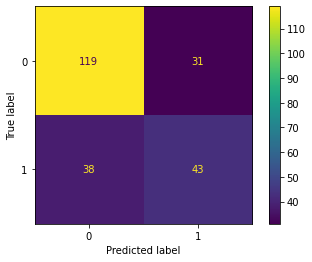

In [50]:
plot_confusion_matrix(clf, X_test, y_test) 

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = 2 * (precision * recall) / (precision + recall)

In [47]:
print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1_score = {f1score}')

accuracy = 0.7012987012987013
precision = 0.581081081081081
recall = 0.5308641975308642
f1_score = 0.5548387096774193


## Let visualize decision tree

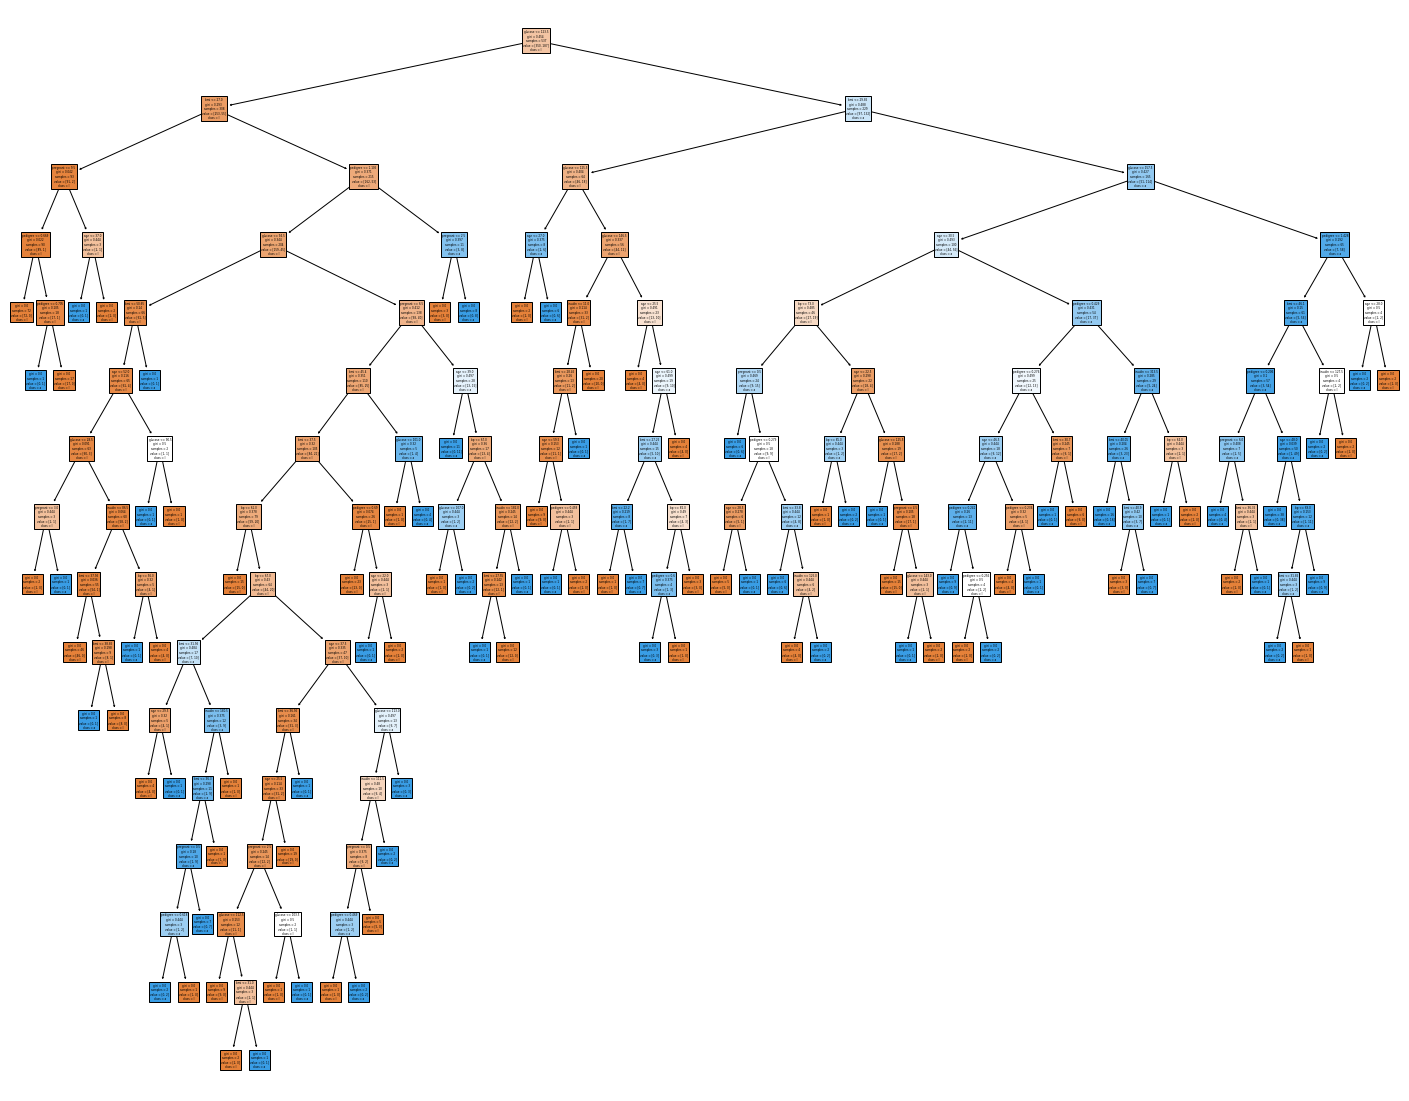

In [15]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
feature_names=feature_cols,
class_names='label',
filled=True)

## Optimize the Parameter by GridSearch

In [20]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['entropy', 'gini'],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(clf, params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [22]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

309
DecisionTreeClassifier(max_leaf_nodes=7)
{'criterion': 'gini', 'max_leaf_nodes': 7, 'min_samples_split': 2}
0.7560055382485288


In [32]:
clf2 = DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes=7,min_samples_split= 2)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)


/Users/euer/Documents/GitHub/ML_template/virtualenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


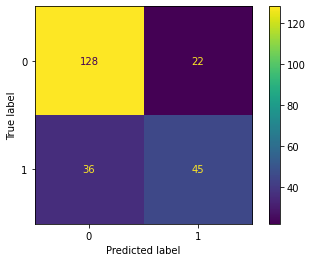

In [33]:
plot_confusion_matrix(clf2, X_test, y_test) 

In [34]:
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1score2 = 2 * (precision * recall) / (precision + recall)

In [35]:
print(f'accuracy = {accuracy2}')
print(f'precision = {precision2}')
print(f'recall = {recall2}')
print(f'f1_score = {f1score2}')

accuracy = 0.7489177489177489
precision = 0.6716417910447762
recall = 0.5555555555555556
f1_score = 0.5548387096774193


In [29]:
print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1_score = {f1score}')

accuracy = 0.7012987012987013
precision = 0.581081081081081
recall = 0.5308641975308642
f1_score = 0.5548387096774193


### At the moment, After tuning the parameter, the model seems to perform 5% better. now let's try Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
rf = RandomForestClassifier()

In [41]:
rf_param = {'criterion': ['entropy', 'gini'],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
rf_best = GridSearchCV(rf,rf_param,verbose=1,cv=5)
rf_best.fit(X_train,y_train)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [42]:
print(rf_best.best_estimator_)
print(rf_best.best_params_)
print(rf_best.best_score_)

RandomForestClassifier(max_leaf_nodes=92, min_samples_split=4)
{'criterion': 'gini', 'max_leaf_nodes': 92, 'min_samples_split': 4}
0.7782969885773624


In [43]:
rf = RandomForestClassifier(criterion='gini',max_leaf_nodes=92,min_samples_split=4)
rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=92, min_samples_split=4)

/Users/euer/Documents/GitHub/ML_template/virtualenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


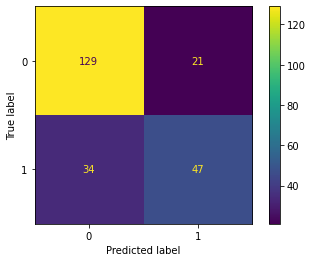

In [44]:
plot_confusion_matrix(rf, X_test, y_test) 

In [51]:
y_pred_rf = rf.predict(X_test)

In [54]:
accuracy3 = accuracy_score(y_test, y_pred_rf)
precision3 = precision_score(y_test, y_pred_rf)
recall3 = recall_score(y_test, y_pred_rf)
f1score3 = 2 * (precision * recall) / (precision + recall)

In [55]:
print(f'accuracy = {accuracy3}')
print(f'precision = {precision3}')
print(f'recall = {recall3}')
print(f'f1_score = {f1score3}')

accuracy = 0.7619047619047619
precision = 0.6911764705882353
recall = 0.5802469135802469
f1_score = 0.6308724832214765


### Lastly let's try Adaboost since this is the binary classification

In [56]:
from sklearn.ensemble import AdaBoostClassifier


In [74]:
ada = AdaBoostClassifier(learning_rate=0.13)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [70]:
ada_param = {'learning_rate': list(np.arange(0.05,0.3,0.01))}
ada_best = GridSearchCV(ada,ada_param,verbose=1,cv=5)
ada_best.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=0.1),
             param_grid={'learning_rate': [0.05, 0.060000000000000005, 0.07,
                                           0.08000000000000002,
                                           0.09000000000000001, 0.1,
                                           0.11000000000000001,
                                           0.12000000000000001, 0.13, 0.14,
                                           0.15000000000000002,
                                           0.16000000000000003,
                                           0.17000000000000004,
                                           0.18000000000000005, 0.19, 0.2,
                                           0.21000000000000002,
                                           0.22000000000000003,
                                           0.23000000000000004,
                                           0.24000000000000005,
                                           0.25000000000000

In [71]:
print(ada_best.best_estimator_)
print(ada_best.best_params_)
print(ada_best.best_score_)

AdaBoostClassifier(learning_rate=0.13)
{'learning_rate': 0.13}
0.7652821045344409


/Users/euer/Documents/GitHub/ML_template/virtualenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


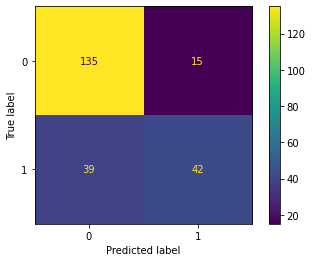

In [73]:
plot_confusion_matrix(ada, X_test, y_test) 

In [75]:
accuracy4 = accuracy_score(y_test, y_pred_ada)
precision4 = precision_score(y_test, y_pred_ada)
recall4 = recall_score(y_test, y_pred_ada)
f1score4 = 2 * (precision * recall) / (precision + recall)

In [76]:
print(f'accuracy = {accuracy4}')
print(f'precision = {precision4}')
print(f'recall = {recall4}')
print(f'f1_score = {f1score4}')

accuracy = 0.7662337662337663
precision = 0.7368421052631579
recall = 0.5185185185185185
f1_score = 0.6308724832214765


## As expected the performance is good by using AdaBoost > Random Forest > Decision Tree